# 🎬 IMDB Top 250 Movies Analysis

In this project, I will analyze the IMDB Top 250 Movies dataset.  
The main goals are to practice **Pandas** and **Matplotlib** by exploring:

- The top-rated movies
- Movies distribution by decades
- Average, longest, and shortest runtimes
- Distribution of movies by rating categories

## Step 0: Setup

First, we will import the required Python libraries and load the dataset.
We will also take an initial look at the data to understand its structure.


In [116]:
import pandas as pd
import matplotlib.pyplot as plt


#load the dataset
imdb = pd.read_csv('IMDB_processed_data.csv')



#preview
imdb.head()



,Rank,Title,Release,Runtime,Rated,Ratings
0,1,The Shawshank Redemption,1994,2h 22m,R,9.3
1,2,The Godfather,1972,2h 55m,R,9.2
2,3,The Dark Knight,2008,2h 32m,PG-13,9.0
3,4,The Godfather Part II,1974,3h 22m,R,9.0
4,5,12 Angry Men,1957,1h 36m,Approved,9.0


## Step 1: Data Preparation

The "Runtime" column is currently in text format ("2h 22m").  
We will convert it into minutes for easier analysis.  
We will also create a new "Decade" column to group movies by release decade.

In [117]:
#convert runtime string into minutes
def run_time(s):
    s = str(s).strip()
    hours = 0
    minutes = 0
    for part in s.split():
        if part.endswith('h'):
            hours = int(part[:-1])
        elif part.endswith('m'):
            minutes = int(part[:-1])

    return  hours * 60 + minutes


imdb['RuntimeMinutes'] = imdb['Runtime'].apply(run_time)

#Create Decade column
imdb['Decade'] = (imdb['Release'] // 10)*10

imdb.head()

,Rank,Title,Release,Runtime,Rated,Ratings,RuntimeMinutes,Decade
0,1,The Shawshank Redemption,1994,2h 22m,R,9.3,142,1990
1,2,The Godfather,1972,2h 55m,R,9.2,175,1970
2,3,The Dark Knight,2008,2h 32m,PG-13,9.0,152,2000
3,4,The Godfather Part II,1974,3h 22m,R,9.0,202,1970
4,5,12 Angry Men,1957,1h 36m,Approved,9.0,96,1950


## Step 2: Top 10 Movies by Rating

We will find the 10 highest-rated movies in the dataset.  



In [118]:
#10 highest-rated movies
top10= imdb.sort_values('Ratings' , ascending=False).head(10)

top10[['Rank','Title' , 'Ratings']]

,Rank,Title,Ratings
0,1,The Shawshank Redemption,9.3
1,2,The Godfather,9.2
2,3,The Dark Knight,9.0
3,4,The Godfather Part II,9.0
4,5,12 Angry Men,9.0
5,6,The Lord of the Rings: The Return of the King,9.0
6,7,Schindler's List,9.0
7,8,Pulp Fiction,8.9
8,9,The Lord of the Rings: The Fellowship of the Ring,8.9
9,10,"The Good, the Bad and the Ugly",8.8


## Step 3: Movies by Decade

We will count how many movies appear in the Top 250 for each decade  
and visualize the results with a bar plot.

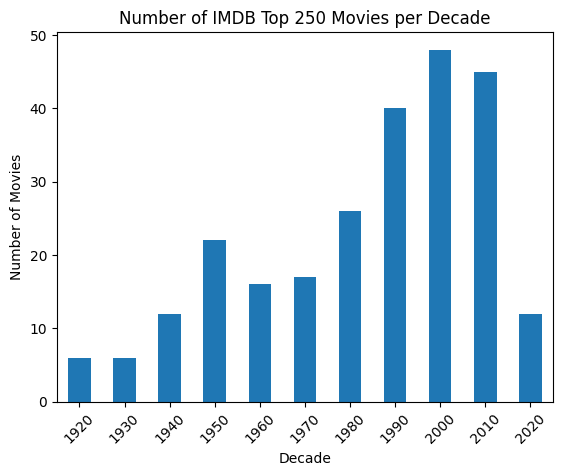

In [ ]:
# Calculate the number of movies per decade
decade_counts = imdb['Decade'].value_counts().sort_index()

# Plot the number of movies
decade_counts.plot(kind='bar' , rot=45)
plt.title('Number of IMDB Top 250 Movies per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.show()



## Step 4: Runtime & Rating Categories

In this step, we will analyze movie runtimes and ratings by:

- Distribution of runtimes (histogram)
- Average runtime of movies
- Longest and shortest movies
- Distribution of movies by rating categories (bar plot)
- Average rating of movies by decade


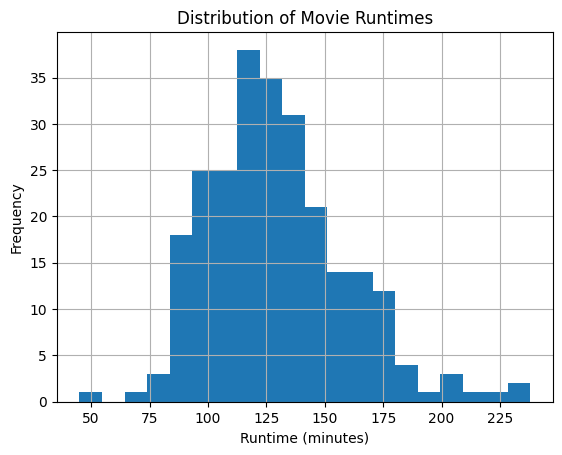

In [ ]:

# Plot the distribution of movie runtimes (histogram)
imdb['RuntimeMinutes'].hist(bins=20)

plt.title("Distribution of Movie Runtimes")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Calculate the average runtime
print("Average runtime:", imdb['RuntimeMinutes'].mean().round(2) , "minutes\n")

# Get the longest movie (maximum runtime)
print("Longest movie:", imdb.loc[imdb["RuntimeMinutes"].idxmax(), ["Title","Runtime" ,'Release','Ratings']].to_dict() ,'\n')

# Get the shortest movie (minimum runtime)
print("Shortest movie:", imdb.loc[imdb["RuntimeMinutes"].idxmin(), ["Title","Runtime" ,'Release','Ratings']].to_dict(),'\n')




Average runtime: 129.8 minutes

Longest movie: {'Title': 'Gone with the Wind', 'Runtime': '3h 58m', 'Release': 1939, 'Ratings': 8.2} 

Shortest movie: {'Title': 'Sherlock Jr.', 'Runtime': '45m', 'Release': 1924, 'Ratings': 8.2} 



### Average Rating by Decade
This table shows the **average IMDB rating** of the Top 250 movies by decade,  
highlighting which eras had the highest-rated films.


In [ ]:
# Calculate the average rating per decade

decade_avg = imdb.groupby("Decade")["Ratings"].mean().round(2).reset_index()
decade_avg.columns = ["Decade", "Average Rating"]
print(decade_avg)

    Decade  Average Rating
0     1920            8.17
1     1930            8.28
2     1940            8.26
3     1950            8.28
4     1960            8.34
5     1970            8.35
6     1980            8.28
7     1990            8.40
8     2000            8.30
9     2010            8.25
10    2020            8.41


### About Rating Categories

- **G**: General audiences (suitable for all ages)  
- **PG**: Parental guidance suggested  
- **PG-13**: Parents strongly cautioned (not suitable for children under 13)  
- **R**: Restricted (under 17 requires accompanying parent or adult guardian)  
- **NC-17**: No one 17 and under admitted  
- **Approved**: Old classification used before MPAA modern system  
- **Passed**: Very old classification used before ratings system  
- **Not Rated / Unrated**: Movies without an official rating


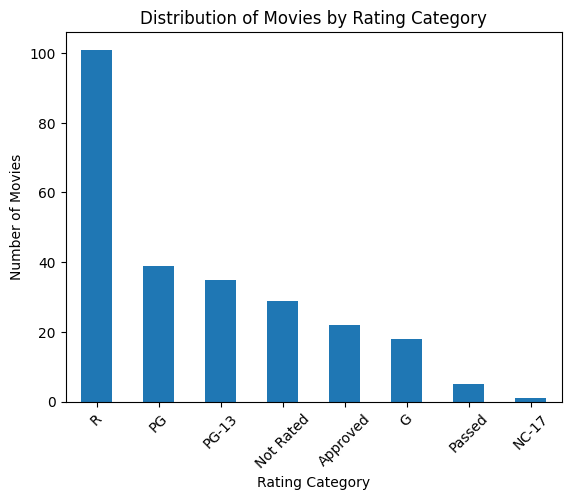

In [ ]:
# Plot the distribution of rating categories

imdb["Rated"].value_counts().plot(kind="bar", rot=45)
plt.title("Distribution of Movies by Rating Category")
plt.xlabel("Rating Category")
plt.ylabel("Number of Movies")
plt.show()

## Step 5: Conclusion

From this analysis, we can conclude:

- The highest-rated movie is **The Shawshank Redemption**
- The decade with the most top movies is **2000s** with 48 movies
- The decade with the highest average rating is **2020s** (8.41),  
  but since this decade has relatively few movies in the Top 250,  
  the **1990s** (8.40) can be considered the strongest decade overall in terms of quality
- The average runtime is around **129.8 minutes**
- Most of the movies are rated as **R**

This project was a great opportunity to practice **Pandas** and **Matplotlib**  
using only `.plot()` and `.hist()` .

